# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [64]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [65]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [66]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [67]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [68]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34779643]
 [ -16.57338609]
 [-254.66343751]
 [ 560.9894609 ]
 [ 278.90965232]
 [-393.45557666]
 [  97.08855335]
 [ -18.9842756 ]
 [ 169.46616165]
 [ 632.96847103]
 [ 114.21833048]]


In [69]:
# def predict(X, beta):

#     # Add intercept term
#     X = np.hstack([np.ones((X.shape[0], 1)), X])

#     # Predict using the formula X * beta
#     predictions = np.dot(X, beta)
#     return predictions

predict = lambda X, beta: np.matmul(X, beta[1:]) + beta[0]

# Make predictions
y_pred = predict(X_test, beta)

# Get a mean squared error
mean_squared_error = lambda y, y_pred: np.mean((y - y_pred)**2)
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2794.587000834296


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

In [70]:
# # use the fourth feature
# # use the first 300 training samples for training, and the rest for testing
# X_train = diabetes.data[:300, np.newaxis, 3]
# y_train = diabetes.target[:300, np.newaxis]
# X_test = diabetes.data[300:, np.newaxis, 3]
# y_test = diabetes.target[300:, np.newaxis]
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# np.unique(X_train).shape

In [71]:
# Concatenate X and y for unique sample identification
X_y_train = np.hstack([X_train, y_train])

# Get unique samples and their counts
unique_data, counts = np.unique(X_y_train, axis=0, return_counts=True)

# Separate the unique X and y
X_unique = unique_data[:, :-1]  # All columns except the last one
y_unique = unique_data[:, -1:]  # Only the last column

def weighted_lsq(X, y, weights):
    """
    Calculate the weighted least squares solution for linear regression.
    :param X: Design matrix (features), shape (n_samples, n_features)
    :param y: Response vector, shape (n_samples, 1)
    :param weights: Weights vector, shape (n_samples,)
    :return: Coefficient vector, shape (n_features + 1, 1)
    """
    # Add intercept term
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Create a diagonal weight matrix
    W = np.diag(weights)
    
    # Calculate beta using the weighted least squares formula
    XTWX = X.T @ W @ X
    XTWy = X.T @ W @ y
    beta = np.linalg.inv(XTWX) @ XTWy
    return beta

# Fit the weighted linear regression model
weights = counts  # Use counts as weights
beta_weighted = weighted_lsq(X_unique, y_unique, weights)

# Define the prediction function with an intercept
predict_weighted = lambda X, beta: np.matmul(np.hstack([np.ones((X.shape[0], 1)), X]), beta)

# Make predictions on the test set
y_pred_weighted = predict_weighted(X_test, beta_weighted)

# Calculate mean squared error
mean_squared_error = lambda y, y_pred: np.mean((y - y_pred) ** 2)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)

print(f"Mean Squared Error (Weighted): {mse_weighted:.4f}")

Mean Squared Error (Weighted): 2794.5870


### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

In [34]:
# Get data from diabetes dataset
X_train = breast_cancer.data[:400, np.newaxis, 3]
y_train = breast_cancer.target[:400, np.newaxis]
X_test = breast_cancer.data[400:, np.newaxis, 3]
y_test = breast_cancer.target[400:, np.newaxis]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import scipy
import scipy.spatial

normalize = lambda matrix: (matrix - np.min(matrix, axis=0)) / (np.max(matrix, axis=0) - np.min(matrix, axis=0))

# Normalize X_train and X_test
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

def nearest_neighbors(X_test, X_train, y_train, k):
    """Computes the nearest neighbors for given data

    ### Args:
        - `data (np.ndarray)`: Input data for which to predict the target values
        - `X_train (np.ndarray)`: Data used to get nearest neighbors
        - `y_train (np.ndarray)`: Labels of the nearest neighbors
        - `k`: Number of nearest neighbors
    """

    # Function to compute distances
    compute_distance = lambda entry, matrix: scipy.spatial.distance.cdist(entry.reshape(1, -1), matrix).reshape(-1,)

    # Function to get indices of nearest neighbors
    compute_neighbors = lambda distances, k: np.argsort(distances)[:k]

    # Function to get most common nearest neighbors
    def nearest_neighbor(y, idx):

        # Only get labels of nearest neighbors
        arr = y[idx]

        # Find the unique values and their counts
        unique_values, counts = np.unique(arr, return_counts=True)

        # Find the index of the maximum count
        most_common_index = np.argmax(counts)

        # Get the most common value
        most_common_value = unique_values[most_common_index]

        return most_common_value
    
    # Finally, a function to compute the nearest neighbors for the entire dataset
    def predict(entry, X_train, y_train, k):

        # Compute distances
        dists = compute_distance(entry, X_train)

        # Get indices of nearest neighbors
        idx = compute_neighbors(dists, k)

        # Return prediction
        pred = nearest_neighbor(y_train, idx)
        return pred

    predictions = np.asarray([predict(entry, X_train, y_train, k) for entry in X_test]).reshape(y_test.shape)
    return predictions

y_pred = nearest_neighbors(X_test_norm, X_train_norm, y_train, 5)

# accuracy = lambda y_test, y_pred: 
accuracy = lambda y_test, y_pred: len(np.where(y_pred.flatten() == y_test.flatten())[0]) / len(y_test)

accuracy(y_test, y_pred)

(400, 1) (400, 1) (169, 1) (169, 1)


0.893491124260355

In [35]:
breast_cancer.data.shape

(569, 30)

### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

In [36]:
# Get data from diabetes dataset
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import scipy
import scipy.spatial

normalize = lambda matrix: (matrix - np.min(matrix, axis=0)) / (np.max(matrix, axis=0) - np.min(matrix, axis=0))

def nearest_neighbors(X_test, X_train, y_train, k):
    """Computes the nearest neighbors for given data

    ### Args:
        - `data (np.ndarray)`: Input data for which to predict the target values
        - `X_train (np.ndarray)`: Data used to get nearest neighbors
        - `y_train (np.ndarray)`: Labels of the nearest neighbors
        - `k`: Number of nearest neighbors
    """

    # Function to compute distances
    compute_distance = lambda entry, matrix: scipy.spatial.distance.cdist(entry.reshape(1, -1), matrix).reshape(-1,)

    # Function to get indices of nearest neighbors
    compute_neighbors = lambda distances, k: np.argsort(distances)[:k]

    # Function to get most common nearest neighbors
    def nearest_neighbor(y, idx):

        # Only get labels of nearest neighbors
        arr = y[idx]

        # Return the average of the nearest neighbors
        return np.mean(arr)
    
    # Finally, a function to compute the nearest neighbors for the entire dataset
    def predict(entry, X_train, y_train, k):

        # Compute distances
        dists = compute_distance(entry, X_train)

        # Get indices of nearest neighbors
        idx = compute_neighbors(dists, k)

        # Return prediction
        pred = nearest_neighbor(y_train, idx)
        return pred

    predictions = np.asarray([predict(entry, X_train, y_train, k) for entry in X_test]).reshape(y_test.shape)
    return predictions

# Print mean squared error
y_pred = nearest_neighbors(X_test, X_train, y_train, 5)
mean_squared_error(y_test, y_pred)

(300, 1) (300, 1) (142, 1) (142, 1)


5784.341126760563

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



In [37]:
# Get data from breast cancer dataset
X = breast_cancer.data
y = breast_cancer.target

# Split X into 0 and 1
X_0 = X[y == 0]
X_1 = X[y == 1]

# Get means and std's
X_0_means = np.mean(X_0, axis=0)
X_0_stds = X_0.std(axis=0)
X_1_means = np.mean(X_1, axis=0)
X_1_stds = X_1.std(axis=0)

# Store feature names in array
features = breast_cancer.feature_names

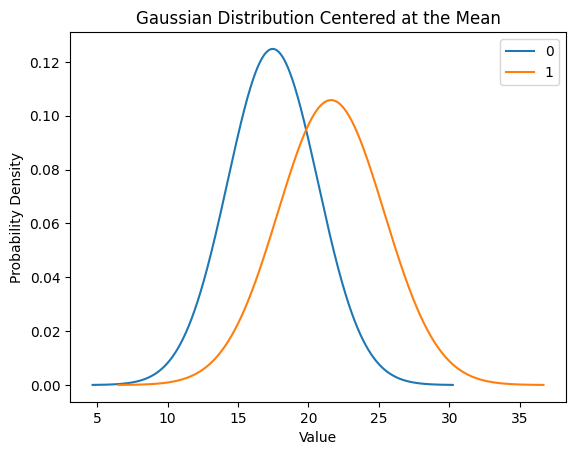

In [38]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-10, 200, 0.01) 
  
# Calculating mean and standard deviation 
mean_0 = X_0_means[0] 
sd_0 = X_0_stds[0] 

mean_1 = X_0_means[1] 
sd_1 = X_0_stds[1] 

# Generate x-axis values symmetrically around the mean
x_axis_0 = np.arange(mean_0 - 4 * sd_0, mean_0 + 4 * sd_0, 0.01)
x_axis_1 = np.arange(mean_1 - 4 * sd_1, mean_1 + 4 * sd_1, 0.01)

# Plot the Gaussian distribution
plt.plot(x_axis_0, norm.pdf(x_axis_0, mean_0, sd_0), label="0")
plt.plot(x_axis_1, norm.pdf(x_axis_1, mean_1, sd_1), label="1")

# Labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution Centered at the Mean')
plt.legend()

plt.show()

C:\Users\BramUser\AppData\Local\Temp\ipykernel_16644\3028501482.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_16644\3028501482.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_16644\3028501482.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
C:\Users\BramUser\AppData\Local\Temp\ipykernel_16644\3028501482.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels

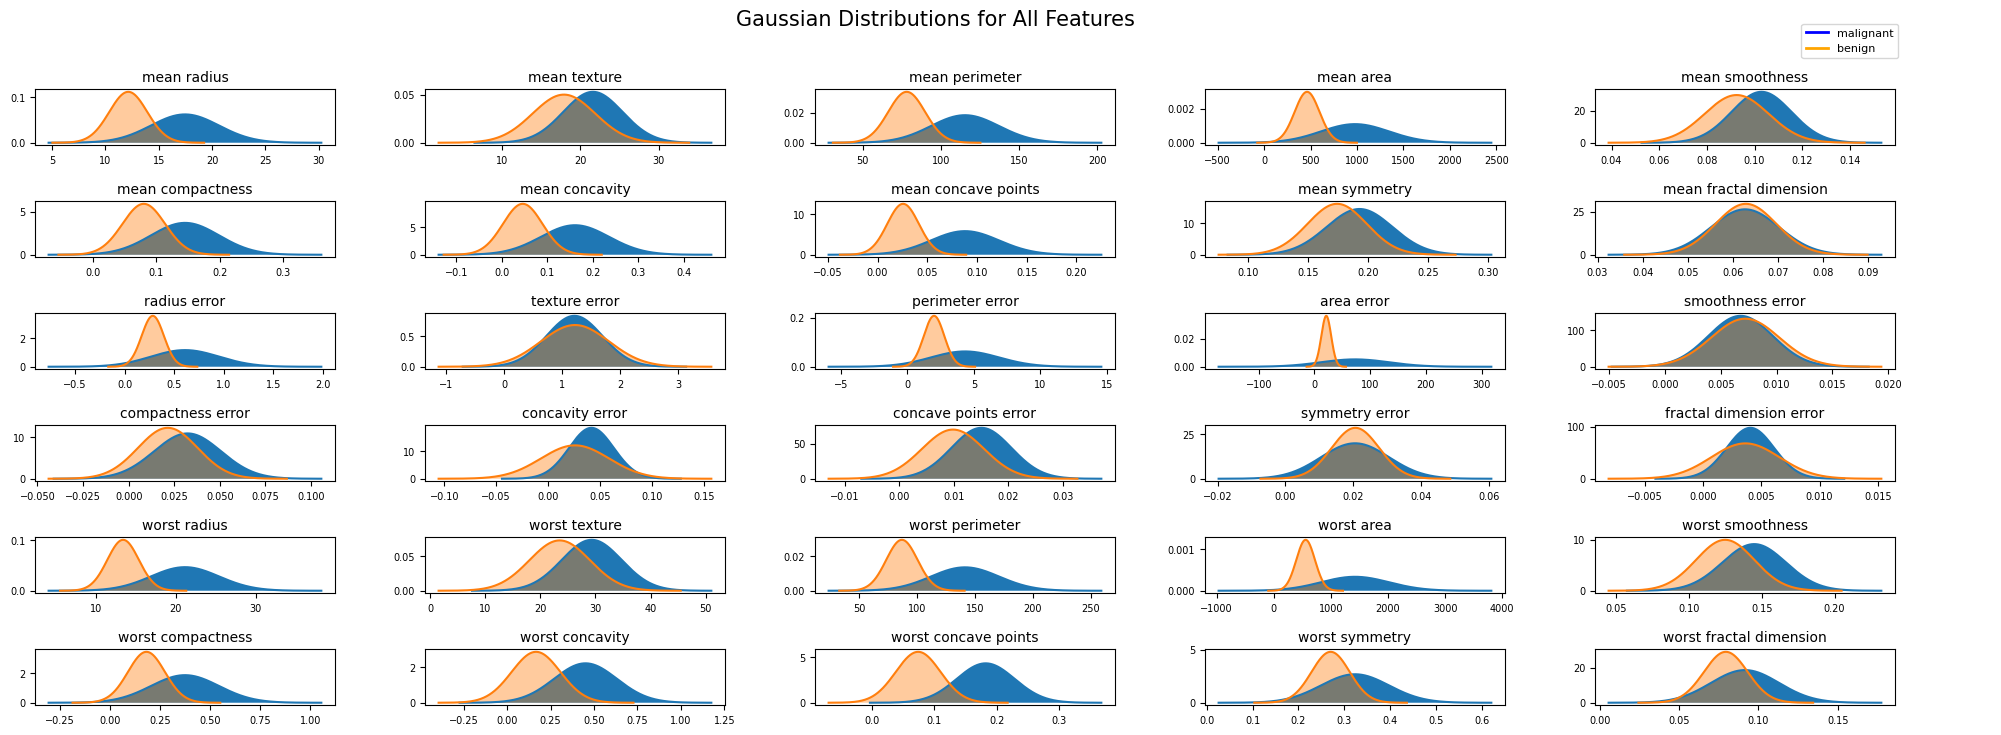

In [39]:
#### Exercise 5: Class-conditional probability
# Get data from breast cancer dataset
X = breast_cancer.data
y = breast_cancer.target

# Split X into 0 and 1
X_0 = X[y == 0]
X_1 = X[y == 1]

# Get means and std's
X_0_means = np.mean(X_0, axis=0)
X_0_stds = X_0.std(axis=0)
X_1_means = np.mean(X_1, axis=0)
X_1_stds = X_1.std(axis=0)

# Store feature names in array
features = breast_cancer.feature_names

# Plot over all features
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(24, 8))

for i, ax in enumerate(axes.flatten()):
    mean_0, sd_0 = X_0_means[i], X_0_stds[i]
    mean_1, sd_1 = X_1_means[i], X_1_stds[i]
    feature = features[i]

    # Generate x-axis values symmetrically around the mean
    factor = 4
    x_axis_0 = np.arange(mean_0 - factor * sd_0, mean_0 + factor * sd_0, 0.0001)
    x_axis_1 = np.arange(mean_1 - factor * sd_1, mean_1 + factor * sd_1, 0.0001)

    # Plot the Gaussian distributions
    ax.plot(x_axis_0, norm.pdf(x_axis_0, mean_0, sd_0), label="0")
    ax.plot(x_axis_1, norm.pdf(x_axis_1, mean_1, sd_1), label="1")
    ax.fill_between(x_axis_0, norm.pdf(x_axis_0, mean_0, sd_0)) # fill_between: obtained by using ChatGPT
    ax.fill_between(x_axis_1, norm.pdf(x_axis_1, mean_1, sd_1), alpha=0.4)
    
    # Set feature name as title
    ax.set_title(feature, fontsize=10)

    # Set ticks to smaller fontsize
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)

# Create custom legend handles -- obtained by asking ChatGPT
legend_handles = [
    Line2D([0], [0], color='blue', lw=2, label='malignant'),
    Line2D([0], [0], color='orange', lw=2, label='benign')
]

# Add a single legend for the entire figure
fig.legend(handles=legend_handles, loc=[0.9, 0.92], fontsize=8)

fig.suptitle('Gaussian Distributions for All Features', fontsize=15)

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3, hspace=1.0) 

# Save and close figure
# plt.savefig(r"class_conditional_probabilities.pdf")
plt.show()